# Introduction

This notebook shows the steps to prepate the maps needed for the wflow_* set of models. The wflow_prepare scripts have a number of specific features that are not used here. This notebook shows the principles and may be used as a template to create better preprocessing options.

In short the steps to generate input files for the wflow models are:

- Create a DEM for the catchment
- Create a local crainage network file for the catchment used the DEM and additional information
- Create a subarea/catchment map by indicating outflow points (gauges) in the map
- Convert/resample landuse and soil maps

The folloing maps are required:

- wflow_dem.map
- wflow_demmax.map (for sbm only)
- wflow_demmin.map (for sbm only)
- wflow_ldd.map
- wflow_landuse.map
- wflow_soil.map
- wflow_river.map
- wflow_subcatch.map

There are more maps but those are optional (but very useful). See the documentation of the wflow_prepare scripts for details

# Example

In [1]:
import os
#os.chdir("/mnt/c/Workspace/Ch3/wflow/")
#os.chdir("/mnt/d/Github/wflow/")
os.chdir(os.path.join("D:\\", "GitHub", "wflow"))

os.getcwd()

import wflow.wflow_lib as tr
import pcraster as pcr
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Process DEM to generate the ldd

Begin by importing the wflow_lib module. This module also imports the pcraster framework. Also set the names of the files we are going to use here.

In [2]:
#ws_name = "san-diego_california_20331196_11023340"
ws_name = "fulton_georgia_2047963_02336410"

#static_dir = str("/mnt/c/Workspace/Ch3/wflow_models/" + ws_name +  "/staticmaps_1km/")
#static_dir = os.path.join("D:\\", "wflow_models", ws_name,  "staticmaps_1km")
#static_dir = os.path.join("D:\\", "wflow_models", ws_name,  "inputs_og", "staticmaps")
static_dir = os.path.join("D:\\", "wflow_models", ws_name,  "inputs_1km", "staticmaps")

#demfilename = "DEM_90m.map"
demfilename = "wflow_dem.map"
#dem_dir = str(static_dir + demfilename)
dem_dir = os.path.join(static_dir, demfilename)
#ws_dir = os.path.join(static_dir, "wflow_pre_ws.map")
print(dem_dir)

D:\wflow_models\fulton_georgia_2047963_02336410\inputs_1km\staticmaps\wflow_dem.map


start by reading the DEM into memory. Note that a DEM can be rather large, in that case it may be good to resample it first before reading it into memory.
Check the dem by plotting it. Note the use of the _pcr2numpy_ function to convert the pcraster map object to a numpy matrixCheck the dem by plotting it. Note the use of the _pcr2numpy_ function to convert the pcraster map object to a numpy matrix

## OK, now use the subcatchments to mask the dem to the catchment we use and save the dem. This will speed-up later calculations. Also save the subcatchment and gauges

In [3]:
dem = pcr.readmap(dem_dir)

ws = pcr.ifthenelse(pcr.defined(dem), pcr.nominal(1), pcr.nominal(0))

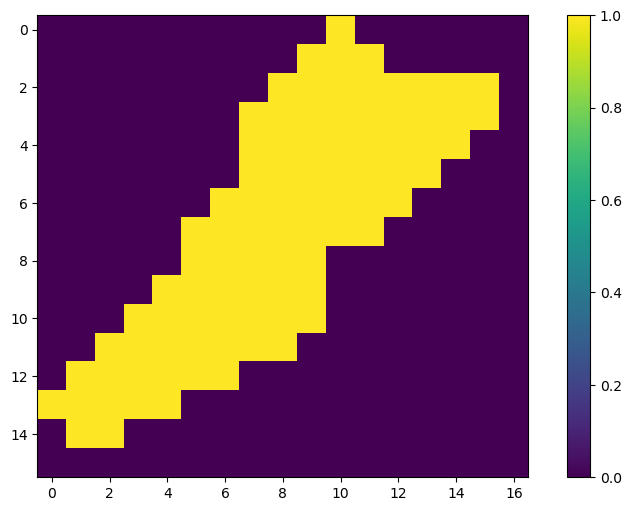

In [4]:
figure(figsize = (10,6))
imshow(pcr.pcr2numpy(ws,np.nan))
colorbar()

In [5]:
pcr.report(pcr.nominal(ws), static_dir + "/wflow_ws.map")